# 7136COMP - Project Dissertation

## AI assistant coach for analysing football players and teams using Machine Learning

### Standard Dataset:

In [1]:
# Common imports
import sklearn; print("version: ",sklearn.__version__) # to check the version

import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

# To plot figures
import matplotlib.pyplot as plt
# tells jupyter to set up Matplotlib so it uses Jupyter's own backend
%matplotlib inline 

# To save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=400):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

version:  0.24.2


## Dataset

In [2]:
# To import the dataset
stan_data = pd.read_csv("./LFC_Data/1_Liv_Standard_merge.csv")

In [3]:
# To take a quick look at the data structure
stan_data.head()

,season,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK_90,xG,npxG,xA,npxG+xA,xG_90,xA_90,xG+xA_90,npxG_90,npxG+xA_90
0,2017,Mohamed Salah,eg EGY,FW,25,36,34,2907.0,32.3,32.0,...,1.27,24.4,22.9,9.0,31.9,0.76,0.28,1.03,0.71,0.99
1,2017,Roberto Firmino,br BRA,FW,25,37,32,2763.0,30.7,15.0,...,0.68,12.1,11.4,5.4,16.7,0.40,0.18,0.57,0.37,0.55
2,2017,Sadio Mané,sn SEN,FW,25,29,28,2190.0,24.3,10.0,...,0.70,10.4,10.4,4.9,15.3,0.43,0.20,0.63,0.43,0.63
3,2017,Georginio Wijnaldum,nl NED,MF,26,33,27,2387.0,26.5,1.0,...,0.11,2.5,2.5,1.5,4.0,0.10,0.06,0.15,0.10,0.15
4,2017,Jordan Henderson,eng ENG,MF,27,27,25,2171.0,24.1,1.0,...,0.08,1.0,0.8,1.8,2.6,0.04,0.07,0.11,0.03,0.11


In [4]:
# To check the data dictionary
data_dict = pd.read_csv("./LFC_Data/1_Data_dictionary.csv")
data_dict

,Column Name,Description
0,season,Year where the data belongs to
1,Player,Name of the player
2,Nation,Nationality of the player
3,Pos,Position of the player
4,Age,Age at the season start for league play
5,MP,Matches played
6,Starts,Game started by player
7,Min,Total minutes played
8,90s,Minutes played divided by 90
9,Gls,Goals scored


In [5]:
# To check number of rows of each attribute and other information
stan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      157 non-null    int64  
 1   Player      157 non-null    object 
 2   Nation      157 non-null    object 
 3   Pos         157 non-null    object 
 4   Age         157 non-null    int64  
 5   MP          157 non-null    int64  
 6   Starts      157 non-null    int64  
 7   Min         129 non-null    float64
 8   90s         129 non-null    float64
 9   Gls         129 non-null    float64
 10  Ast         129 non-null    float64
 11  G-PK        129 non-null    float64
 12  PK          129 non-null    float64
 13  PKatt       129 non-null    float64
 14  CrdY        129 non-null    float64
 15  CrdR        129 non-null    float64
 16  Gls_90      129 non-null    float64
 17  Ast_90      129 non-null    float64
 18  G+A_90      129 non-null    float64
 19  G-PK_90     129 non-null    f

In [6]:
# To check the descriptive stats of the data
stan_data.describe()

,season,Age,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,...,G+A-PK_90,xG,npxG,xA,npxG+xA,xG_90,xA_90,xG+xA_90,npxG_90,npxG+xA_90
count,157.000000,157.000000,157.000000,157.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,...,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,2019.095541,24.522293,16.891720,13.312102,1457.914729,16.201550,3.178295,2.294574,2.968992,0.209302,...,0.373488,3.006977,2.834109,2.034884,4.865891,0.220543,0.156977,0.376434,0.213953,0.369922
std,1.449064,4.460059,13.521388,12.906892,1093.898312,12.154294,5.706972,3.324631,5.242462,0.853983,...,1.023305,5.195629,4.789515,2.651905,6.861492,0.447450,0.571565,0.716480,0.444669,0.714315
min,2017.000000,16.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,21.000000,2.000000,1.000000,382.000000,4.200000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.300000,0.300000,0.200000,0.600000,0.030000,0.020000,0.090000,0.030000,0.090000
50%,2019.000000,25.000000,15.000000,9.000000,1260.000000,14.000000,1.000000,1.000000,1.000000,0.000000,...,0.180000,1.200000,1.100000,0.900000,2.200000,0.080000,0.080000,0.200000,0.080000,0.200000
75%,2020.000000,28.000000,29.000000,25.000000,2537.000000,28.200000,3.000000,3.000000,3.000000,0.000000,...,0.480000,2.600000,2.500000,2.600000,4.900000,0.280000,0.180000,0.530000,0.280000,0.530000
max,2021.000000,35.000000,38.000000,38.000000,3420.000000,38.000000,32.000000,13.000000,31.000000,6.000000,...,11.250000,24.400000,22.900000,11.200000,31.900000,4.480000,6.500000,6.500000,4.480000,6.500000


In [7]:
# To check the distinct values so that there isn't any imbalance of the data
stan_data["season"].value_counts()

2020    35
2021    35
2017    32
2019    29
2018    26
Name: season, dtype: int64

In [8]:
# To check the null value
stan_data.isnull().sum()

season         0
Player         0
Nation         0
Pos            0
Age            0
MP             0
Starts         0
Min           28
90s           28
Gls           28
Ast           28
G-PK          28
PK            28
PKatt         28
CrdY          28
CrdR          28
Gls_90        28
Ast_90        28
G+A_90        28
G-PK_90       28
G+A-PK_90     28
xG            28
npxG          28
xA            28
npxG+xA       28
xG_90         28
xA_90         28
xG+xA_90      28
npxG_90       28
npxG+xA_90    28
dtype: int64

It can be seen that there are 28 instances where the feature value is null for most of the features. Hence, this instances can be removed rather than inserting mean or median values since these players haven't played that match at all.

## Data Preprocessing and EDA

In [9]:
# To check the shape of the dataset
stan_data.shape

(157, 30)

In [10]:
# To drop the instances that have null values
stan_data.dropna(inplace=True)

# To check the updated shape of dataset
stan_data.shape

(129, 30)

In [11]:
# Checking again for data imbalance after removing null instances
stan_data['season'].value_counts()

2020    28
2017    27
2021    27
2019    24
2018    23
Name: season, dtype: int64

Saving figure 01_hist_features


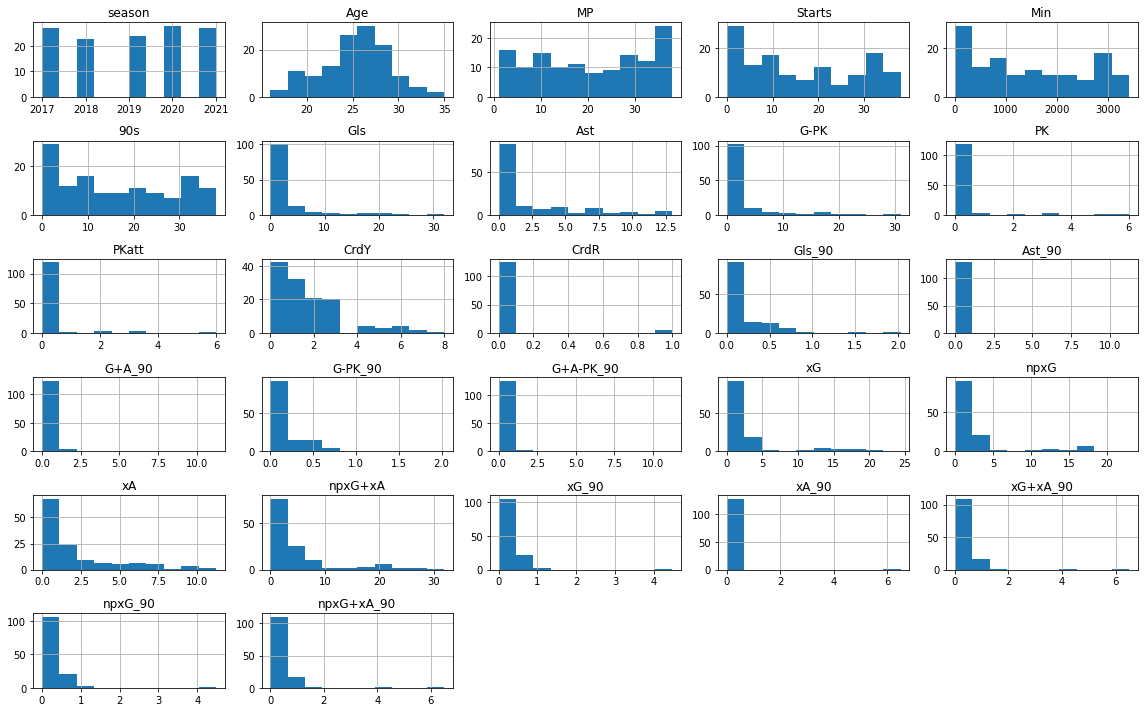

In [12]:
# To show the histogram of all the features
stan_data.hist(figsize=(16,10))
save_fig("01_hist_features")
plt.show()

Gist of overview:

There are many instances where scoring goals is zero because most of the goals are scored by the striker or forward. It can also be seen that in assist, penalty and other features because these are position specific meaning that only specific player at certain playing position has more chance. For example, most shots are blocked by defender as they are in the position from where they can block the shot from the opposition players similarly most goals are scored by strikers and forward because of there position of play.


Saving figure 01_Gls_vs_exptdGls


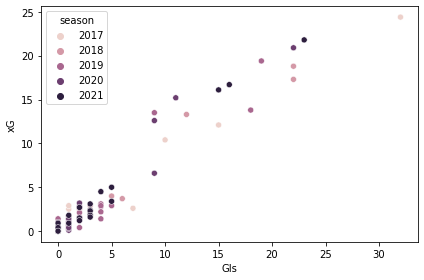

In [13]:
# To show the relation between goals scored and the expected goals
sns.scatterplot(data=stan_data, x="Gls", y="xG", hue='season')
save_fig("01_Gls_vs_exptdGls")

<AxesSubplot:xlabel='Gls', ylabel='MP'>

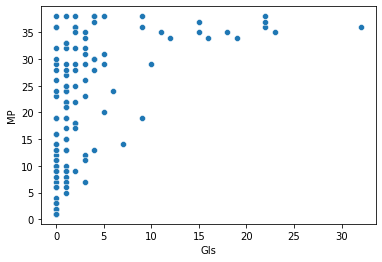

In [14]:
# To show the relation between Goals and matches played
sns.scatterplot(x="Gls", y="MP", data=stan_data)

<AxesSubplot:xlabel='Ast', ylabel='xA'>

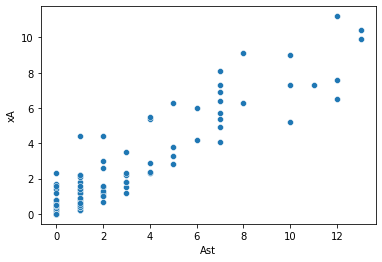

In [15]:
# To see the graph between assist and expected assist
sns.scatterplot(x="Ast", y="xA", data=stan_data)

Saving figure 01_Gls_vs_Pos


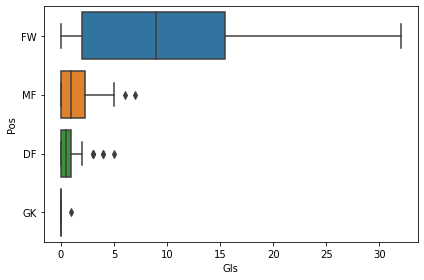

In [16]:
# To show the relation between goals scored as per the position played
sns.boxplot(x="Gls",y="Pos", data=stan_data)
save_fig("01_Gls_vs_Pos")

<AxesSubplot:xlabel='Pos', ylabel='Min'>

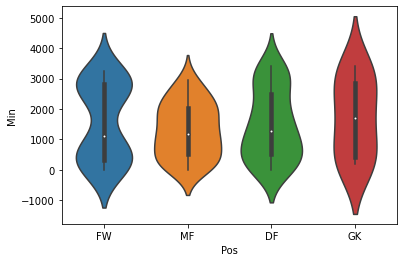

In [17]:
# To show the relation between position played and goals
sns.violinplot(x="Pos", y="Min", data=stan_data)

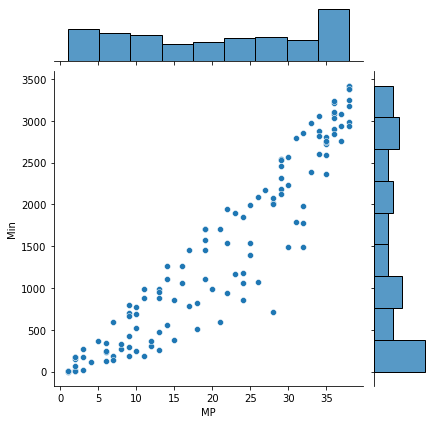

In [18]:
# To show the relation between matches played and the total minutes played
sns.jointplot(x="MP", y="Min", data=stan_data)

Saving figure 01_Goal_distribution


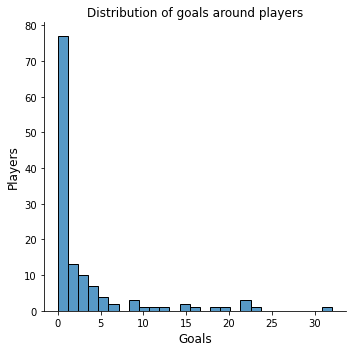

In [19]:
# To show the distribution of goals among players
sns.displot(stan_data["Gls"])
plt.title("Distribution of goals around players", fontsize=12)
plt.xlabel("Goals", fontsize=12)
plt.ylabel("Players", fontsize=12)
save_fig("01_Goal_distribution")
plt.show()

Saving figure 01_Goals_Age_plot


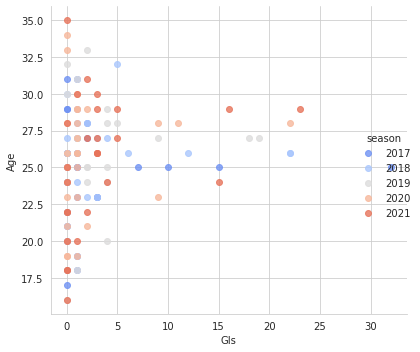

In [20]:
# To check the relation of goals with age
sns.set_style('whitegrid')
sns.lmplot('Gls','Age', data=stan_data, hue='season', palette='coolwarm',
          height=5, aspect=1, fit_reg=False)

save_fig("01_Goals_Age_plot")
plt.show()

<AxesSubplot:xlabel='90s'>

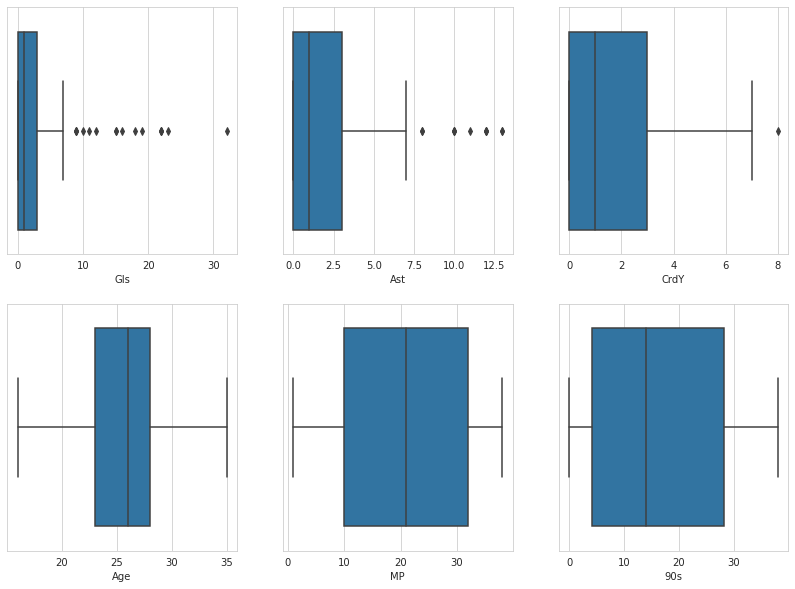

In [21]:
# To show distplot of different features
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Gls',data=stan_data)
plt.subplot(2,3,2)
sns.boxplot(x='Ast',data=stan_data)
plt.subplot(2,3,3)
sns.boxplot(x='CrdY',data=stan_data)
plt.subplot(2,3,4)
sns.boxplot(x='Age',data=stan_data)
plt.subplot(2,3,5)
sns.boxplot(x='MP',data=stan_data)
plt.subplot(2,3,6)
sns.boxplot(x='90s',data=stan_data)

We can see that when the age is keep on increasing the player starts scoring more goals at certain age which is till 30. Therefore, this is the reason most players get sold after the age of 30-35.

# Feature Engineering

In [22]:
# To see the correlation between the features using correlation matrix
corr_data = stan_data.corr()
corr_data

,season,Age,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,...,G+A-PK_90,xG,npxG,xA,npxG+xA,xG_90,xA_90,xG+xA_90,npxG_90,npxG+xA_90
season,1.000000,0.058381,-0.048132,-0.035113,-0.036253,-0.036110,-0.012223,0.004113,-0.021516,0.050397,...,0.144482,0.016940,0.011557,0.022498,0.016538,0.117032,0.122746,0.172030,0.115853,0.170905
Age,0.058381,1.000000,0.345874,0.255819,0.267290,0.267096,0.154970,0.039230,0.138060,0.188098,...,-0.082630,0.161184,0.147899,0.076961,0.132497,-0.145246,-0.098707,-0.169364,-0.159703,-0.178707
MP,-0.048132,0.345874,1.000000,0.932648,0.943278,0.943323,0.503042,0.590606,0.503353,0.271713,...,-0.055711,0.517899,0.521627,0.647881,0.613517,-0.080812,-0.081077,-0.116030,-0.095852,-0.125191
Starts,-0.035113,0.255819,0.932648,1.000000,0.997529,0.997519,0.499522,0.591678,0.501935,0.256890,...,-0.062415,0.512785,0.518007,0.644159,0.609421,-0.100649,-0.072888,-0.121327,-0.113563,-0.128949
Min,-0.036253,0.267290,0.943278,0.997529,1.000000,0.999998,0.489090,0.595511,0.489597,0.262919,...,-0.063895,0.502740,0.506293,0.645973,0.601962,-0.102550,-0.073856,-0.123330,-0.115946,-0.131305
90s,-0.036110,0.267096,0.943323,0.997519,0.999998,1.000000,0.489104,0.595624,0.489594,0.263030,...,-0.063775,0.502704,0.506239,0.646075,0.601965,-0.102567,-0.073777,-0.123278,-0.115968,-0.131256
Gls,-0.012223,0.154970,0.503042,0.499522,0.489090,0.489104,1.000000,0.530847,0.991418,0.596616,...,0.156331,0.969903,0.960331,0.664413,0.925825,0.265122,0.027782,0.186731,0.235876,0.168650
Ast,0.004113,0.039230,0.590606,0.591678,0.595511,0.595624,0.530847,1.000000,0.520487,0.352342,...,0.122643,0.547412,0.538519,0.931281,0.735051,0.054562,0.084672,0.101002,0.035670,0.089523
G-PK,-0.021516,0.138060,0.503353,0.501935,0.489597,0.489594,0.991418,0.520487,1.000000,0.486582,...,0.159339,0.958146,0.963006,0.653119,0.923346,0.263550,0.025807,0.183983,0.240377,0.169840
PK,0.050397,0.188098,0.271713,0.256890,0.262919,0.263030,0.596616,0.352342,0.486582,1.000000,...,0.066565,0.599738,0.505937,0.430724,0.518808,0.153859,0.027236,0.118443,0.100670,0.084426


In [23]:
corr_data.shape

(27, 27)

Saving figure 01_corr_heatmap


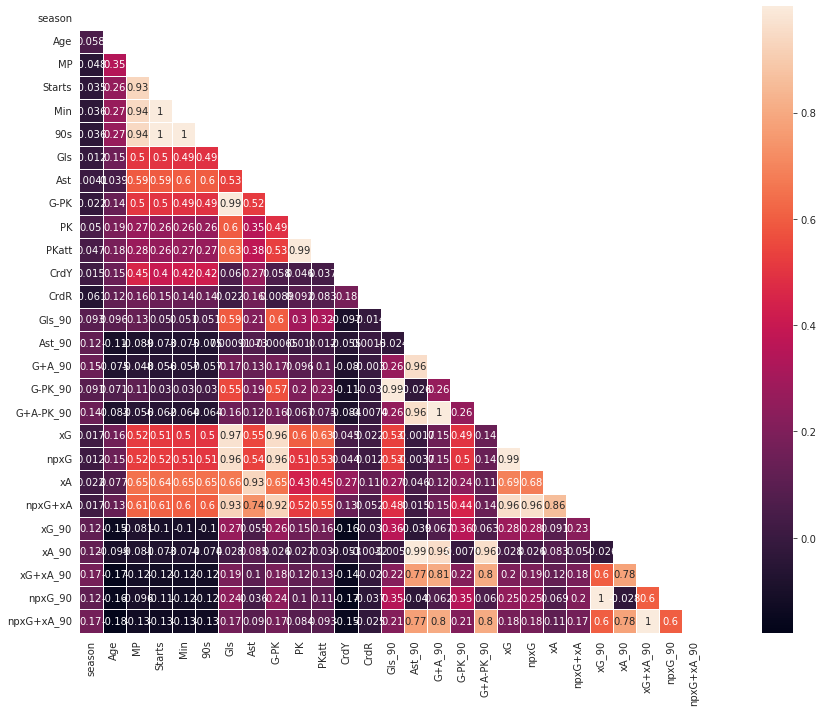

In [24]:
# To visualise correlation matrix in a better way
plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(corr_data, dtype=np.bool))
sns.heatmap(corr_data, mask=mask, linewidths=.5, annot=True, square=True)
save_fig("01_corr_heatmap")

So we can see that there is correlation between some of the features, therefore high correlated features can be removed.

In [25]:
# To check highly correlated features whose correlation score is more than 90%
corr_features = set()
for i in range(len(corr_data.columns)):
    for j in range(i):
        if abs(corr_data.iloc[i,j]) > 0.9:
            col_name = corr_data.columns[i]
            corr_features.add(col_name)

In [26]:
len(corr_features)

15

In [27]:
print(corr_features)

{'G+A-PK_90', 'PKatt', 'xA_90', 'G-PK', '90s', 'xG', 'npxG_90', 'xA', 'Min', 'Starts', 'G-PK_90', 'npxG', 'npxG+xA_90', 'G+A_90', 'npxG+xA'}


It can be observed that there are 15 highly correlated features, but we cannot eliminate or discard all of them because some of them are critical for the model to perform effectively. Therefore, I am going to remove them manually according to their importance.

In [28]:
# To drop the unwanted features
stan_data.drop(['MP','Starts','Min','PKatt','G+A-PK_90','npxG+xA','npxG+xA_90'], axis=1, inplace=True)

In [29]:
stan_data.shape

(129, 23)

In [30]:
stan_data.head()

,season,Player,Nation,Pos,Age,90s,Gls,Ast,G-PK,PK,...,Ast_90,G+A_90,G-PK_90,xG,npxG,xA,xG_90,xA_90,xG+xA_90,npxG_90
0,2017,Mohamed Salah,eg EGY,FW,25,32.3,32.0,10.0,31.0,1.0,...,0.31,1.30,0.96,24.4,22.9,9.0,0.76,0.28,1.03,0.71
1,2017,Roberto Firmino,br BRA,FW,25,30.7,15.0,7.0,14.0,1.0,...,0.23,0.72,0.46,12.1,11.4,5.4,0.40,0.18,0.57,0.37
2,2017,Sadio Mané,sn SEN,FW,25,24.3,10.0,7.0,10.0,0.0,...,0.29,0.70,0.41,10.4,10.4,4.9,0.43,0.20,0.63,0.43
3,2017,Georginio Wijnaldum,nl NED,MF,26,26.5,1.0,2.0,1.0,0.0,...,0.08,0.11,0.04,2.5,2.5,1.5,0.10,0.06,0.15,0.10
4,2017,Jordan Henderson,eng ENG,MF,27,24.1,1.0,1.0,1.0,0.0,...,0.04,0.08,0.04,1.0,0.8,1.8,0.04,0.07,0.11,0.03


## K-Means Clustering without PCA

This is the most often used clustering approach. In each iteration, it uses the Euclidean distance between clusters to determine which data point belongs to which cluster and then proceeds appropriately. Several strategies can be used to determine how many clusters to consider. Elbow Curve is the most basic and regularly used approach.

In [31]:
# To check the original data
stan_data.head()

,season,Player,Nation,Pos,Age,90s,Gls,Ast,G-PK,PK,...,Ast_90,G+A_90,G-PK_90,xG,npxG,xA,xG_90,xA_90,xG+xA_90,npxG_90
0,2017,Mohamed Salah,eg EGY,FW,25,32.3,32.0,10.0,31.0,1.0,...,0.31,1.30,0.96,24.4,22.9,9.0,0.76,0.28,1.03,0.71
1,2017,Roberto Firmino,br BRA,FW,25,30.7,15.0,7.0,14.0,1.0,...,0.23,0.72,0.46,12.1,11.4,5.4,0.40,0.18,0.57,0.37
2,2017,Sadio Mané,sn SEN,FW,25,24.3,10.0,7.0,10.0,0.0,...,0.29,0.70,0.41,10.4,10.4,4.9,0.43,0.20,0.63,0.43
3,2017,Georginio Wijnaldum,nl NED,MF,26,26.5,1.0,2.0,1.0,0.0,...,0.08,0.11,0.04,2.5,2.5,1.5,0.10,0.06,0.15,0.10
4,2017,Jordan Henderson,eng ENG,MF,27,24.1,1.0,1.0,1.0,0.0,...,0.04,0.08,0.04,1.0,0.8,1.8,0.04,0.07,0.11,0.03


In [32]:
# To update the data for training the model
updated_data = stan_data
updated_data = updated_data.drop(['Player', 'Nation','Pos'], axis=1)

In [33]:
# To check the updated data
updated_data.head()

,season,Age,90s,Gls,Ast,G-PK,PK,CrdY,CrdR,Gls_90,Ast_90,G+A_90,G-PK_90,xG,npxG,xA,xG_90,xA_90,xG+xA_90,npxG_90
0,2017,25,32.3,32.0,10.0,31.0,1.0,1.0,0.0,0.99,0.31,1.30,0.96,24.4,22.9,9.0,0.76,0.28,1.03,0.71
1,2017,25,30.7,15.0,7.0,14.0,1.0,1.0,0.0,0.49,0.23,0.72,0.46,12.1,11.4,5.4,0.40,0.18,0.57,0.37
2,2017,25,24.3,10.0,7.0,10.0,0.0,3.0,1.0,0.41,0.29,0.70,0.41,10.4,10.4,4.9,0.43,0.20,0.63,0.43
3,2017,26,26.5,1.0,2.0,1.0,0.0,1.0,0.0,0.04,0.08,0.11,0.04,2.5,2.5,1.5,0.10,0.06,0.15,0.10
4,2017,27,24.1,1.0,1.0,1.0,0.0,1.0,0.0,0.04,0.04,0.08,0.04,1.0,0.8,1.8,0.04,0.07,0.11,0.03


In [34]:
updated_data.shape

(129, 20)

In [35]:
# To standardize the data first and will use the scaled data for all clustering works
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_data = sc.fit_transform(updated_data)

In [36]:
# To plot the elbow curve
from sklearn.cluster import KMeans

# To train the scaled data in a for loop for inertia value
kmeans_clus = [KMeans(n_clusters=i, random_state=42).fit(scaled_data) for i in range(1,11)]
inertia = [mod.inertia_ for mod in kmeans_clus]

Inertia is the sum of squares within a cluster. It is a measurement that shows how well the clusters work together. Inertia assumes that clusters are convex and isotropic. It doesn't work well for long clusters or manifolds with odd shapes, so hierarchical clustering is a better choice here. Inertia also doesn't work well in spaces with a lot of dimensions because Euclidean distances between points are inflated and no normalisation is done first; they are not a standardised metric.

In [37]:
# To check the value of inertia
inertia

[2580.0,
 1935.2857292190026,
 1488.1029208771963,
 1301.274855628869,
 1085.5917616615113,
 929.2976399143943,
 813.1616301543885,
 711.1759712130809,
 624.7586300486245,
 586.9258618827282]

Plotting elbow curve: 
    
Wherever a "knee" like bend is noticed in this curve, it can be taken as the ideal number of clusters to consider for the K-Means model.

Saving figure 01_Elbow_point


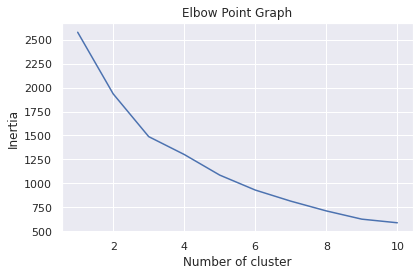

In [38]:
# To plot the elbow curve
sns.set()
plt.plot(range(1,11), inertia)
plt.title('Elbow Point Graph')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
save_fig("01_Elbow_point")
plt.show()

In [39]:
# To check silhoutte score
from sklearn.metrics import silhouette_score

sil_score = []
for i in range(2, 10):
    # intialise kmeans
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    
    cluster_label = kmeans.labels_
    
    silt_sc = silhouette_score(scaled_data, cluster_label)
    
    sil_score.append(silt_sc)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, silt_sc))

For n_clusters=2, the silhouette score is 0.5063206222465879
For n_clusters=3, the silhouette score is 0.4939962584604744
For n_clusters=4, the silhouette score is 0.19556691308613958
For n_clusters=5, the silhouette score is 0.24188945603130432
For n_clusters=6, the silhouette score is 0.2079181980203872
For n_clusters=7, the silhouette score is 0.3166093953709167
For n_clusters=8, the silhouette score is 0.22583864787646518
For n_clusters=9, the silhouette score is 0.22175546091838583


Saving figure 01_Sil_score


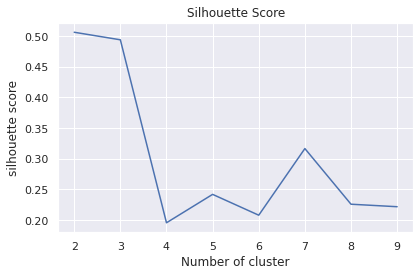

In [40]:
# To show the graphical way of silhoutte score
plt.plot(range(2,10), sil_score)
plt.title('Silhouette Score')
plt.xlabel('Number of cluster')
plt.ylabel('silhouette score')
save_fig("01_Sil_score")
plt.show()

When you plot the silhouette coefficient of each instance, ordered by cluster and coefficient value, you get an even more interesting visualisation. This is known as a silhouette diagram:

Saving figure 01_sil_diag


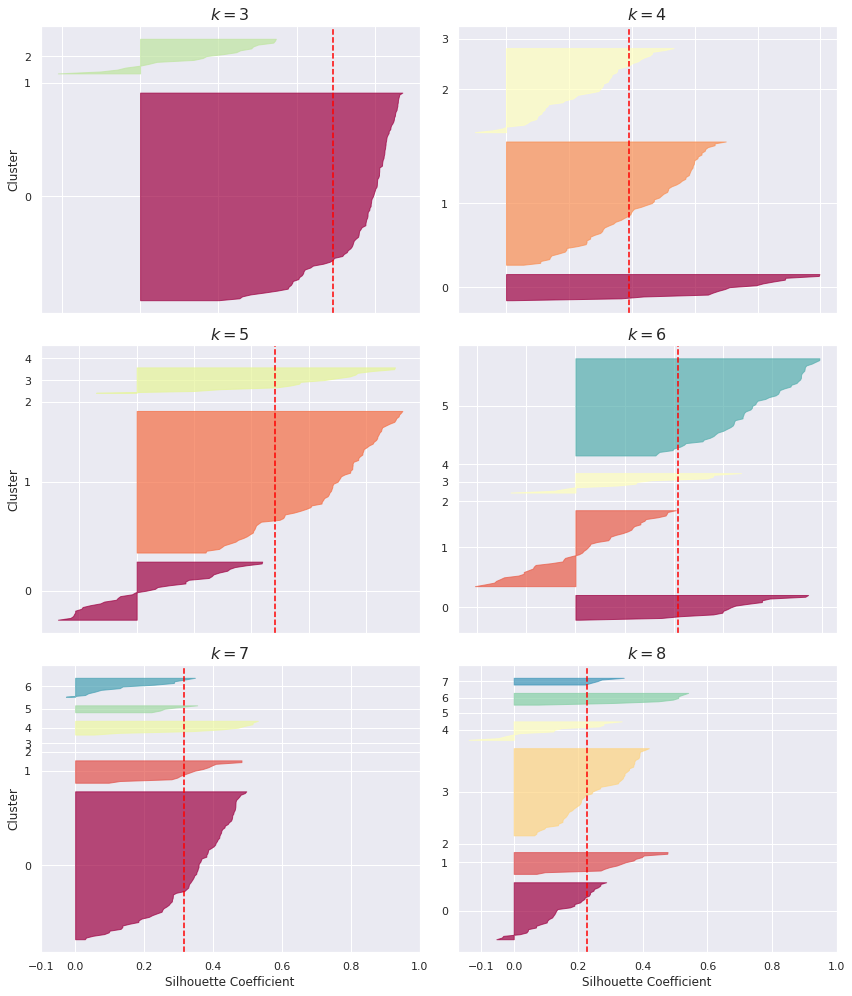

In [41]:
# To plot the silhouette diagram
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

import matplotlib as mpl

plt.figure(figsize=(12,14))

for i in (3,4,5,6,7,8):
    plt.subplot(3,2,i-2)
    
    y_pred = kmeans_clus[i-1].labels_
    sil_coeff = silhouette_samples(scaled_data, y_pred)
    
    padding = len(scaled_data)//30
    posit = padding
    ticks = []
    for j in range(i):
        coeffs = sil_coeff[y_pred == j]
        coeffs.sort()
        
        color = mpl.cm.Spectral(j / i)
        plt.fill_betweenx(np.arange(posit, posit + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        
        ticks.append(posit+len(coeffs)//2)
        posit+=len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(i)))
    
    if i in (3,5,7):
        plt.ylabel("Cluster")
        
    if i in (7,8):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
        
    else:
        plt.tick_params(labelbottom=False)
    
    plt.axvline(x=sil_score[i - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(i), fontsize=16)
save_fig('01_sil_diag')
plt.show()

Let's see the centroids of the clusters. Afterwards, we will fit our scaled data into a K-Means model having 4 clusters, and then label each data point (each record) to one of these 4 clusters.


In [42]:
# Running K means in 4 clusters 
kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_4.fit(scaled_data)

# predictions for new data
pred = kmeans_4.predict(scaled_data)

# To check the centers of the cluster
print(kmeans_4.cluster_centers_)

[[-0.02695114  0.34944769  1.23606188  2.43134053  1.36044902  2.43152523
   1.3213525   0.05575658  0.14457948  1.21152034  0.02308147  0.37190931
   1.12701528  2.59166235  2.61289337  1.71301672  0.6868199   0.09430111
   0.50100487  0.6262217 ]
 [ 0.04569627 -0.2612828  -0.79872245 -0.35692334 -0.50808441 -0.34846854
  -0.24604495 -0.53326063 -0.20080483  0.01613246 -0.12573997 -0.11659215
   0.0434374  -0.37682901 -0.37254745 -0.54205598  0.09589359 -0.12733765
  -0.04122081  0.11136921]
 [-0.08741545  0.29592752  0.78920442 -0.2608078   0.30490928 -0.27297701
  -0.0671572   0.77882206  0.24969644 -0.40484577 -0.06823846 -0.1827825
  -0.41735922 -0.28361704 -0.2964931   0.2427323  -0.35287738 -0.08747381
  -0.28985517 -0.35591379]
 [ 1.36372784 -1.34843376 -1.32992703 -0.5590856  -0.39090672 -0.56854345
  -0.24604495 -0.93370144 -0.20080483 -0.63077455 11.21732492 10.64102945
  -0.61701066 -0.5810076  -0.59403881 -0.543186   -0.49480947 11.14090128
   8.58005871 -0.48302831]]


In [43]:
# To return label for each data point based on their cluster
print(kmeans_4.labels_)

[0 0 0 2 2 2 2 2 2 2 1 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 0 2 0 2 2 2
 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 0 0 0 2 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1
 2 0 2 2 2 0 0 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 2 0
 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 3]


In [44]:
# To see the number of records belong to different cluster
pd.Series(kmeans_4.labels_).value_counts()

1    67
2    46
0    15
3     1
dtype: int64

In [45]:
# To add the cluster column in the dataset
pred = kmeans_4.labels_
df_data = pd.DataFrame(stan_data)
df_data['K_M_Clusters'] = pred
df_data.head()

,season,Player,Nation,Pos,Age,90s,Gls,Ast,G-PK,PK,...,G+A_90,G-PK_90,xG,npxG,xA,xG_90,xA_90,xG+xA_90,npxG_90,K_M_Clusters
0,2017,Mohamed Salah,eg EGY,FW,25,32.3,32.0,10.0,31.0,1.0,...,1.30,0.96,24.4,22.9,9.0,0.76,0.28,1.03,0.71,0
1,2017,Roberto Firmino,br BRA,FW,25,30.7,15.0,7.0,14.0,1.0,...,0.72,0.46,12.1,11.4,5.4,0.40,0.18,0.57,0.37,0
2,2017,Sadio Mané,sn SEN,FW,25,24.3,10.0,7.0,10.0,0.0,...,0.70,0.41,10.4,10.4,4.9,0.43,0.20,0.63,0.43,0
3,2017,Georginio Wijnaldum,nl NED,MF,26,26.5,1.0,2.0,1.0,0.0,...,0.11,0.04,2.5,2.5,1.5,0.10,0.06,0.15,0.10,2
4,2017,Jordan Henderson,eng ENG,MF,27,24.1,1.0,1.0,1.0,0.0,...,0.08,0.04,1.0,0.8,1.8,0.04,0.07,0.11,0.03,2


In [46]:
# To add the respective feature name on the scaled data
df_scaled_data = pd.DataFrame(scaled_data)
col_li = list(updated_data.columns)
df_scaled_data.columns = col_li
df_scaled_data.head()

,season,Age,90s,Gls,Ast,G-PK,PK,CrdY,CrdR,Gls_90,Ast_90,G+A_90,G-PK_90,xG,npxG,xA,xG_90,xA_90,xG+xA_90,npxG_90
0,-1.41763,-0.075023,1.329671,5.069952,2.326714,5.367763,0.929503,-0.362860,-0.200805,2.742601,0.115093,0.899301,2.722613,4.133557,4.205879,2.636697,1.210327,0.216078,0.915746,1.119891
1,-1.41763,-0.075023,1.197517,2.079526,1.420841,2.112369,0.929503,-0.362860,-0.200805,1.038876,0.033906,0.331441,0.983226,1.756953,1.795440,1.273890,0.402631,0.040438,0.271216,0.352296
2,-1.41763,-0.075023,0.668901,1.199989,1.420841,1.346394,-0.246045,0.778822,4.979960,0.766280,0.094796,0.311860,0.809287,1.428479,1.585837,1.084611,0.469939,0.075566,0.355285,0.487754
3,-1.41763,0.179660,0.850613,-0.383178,-0.088949,-0.377050,-0.246045,-0.362860,-0.200805,-0.494477,-0.118318,-0.265790,-0.477860,-0.097958,-0.070030,-0.202484,-0.270449,-0.170330,-0.317269,-0.257265
4,-1.41763,0.434342,0.652382,-0.383178,-0.390907,-0.377050,-0.246045,-0.362860,-0.200805,-0.494477,-0.158911,-0.295163,-0.477860,-0.387788,-0.426356,-0.088917,-0.405065,-0.152766,-0.373315,-0.415299


In [47]:
# To add the cluster column in the scaled dataset
pred = kmeans_4.labels_
df_scaled_data['K_M_Clusters'] = pred
df_scaled_data.head()

,season,Age,90s,Gls,Ast,G-PK,PK,CrdY,CrdR,Gls_90,...,G+A_90,G-PK_90,xG,npxG,xA,xG_90,xA_90,xG+xA_90,npxG_90,K_M_Clusters
0,-1.41763,-0.075023,1.329671,5.069952,2.326714,5.367763,0.929503,-0.362860,-0.200805,2.742601,...,0.899301,2.722613,4.133557,4.205879,2.636697,1.210327,0.216078,0.915746,1.119891,0
1,-1.41763,-0.075023,1.197517,2.079526,1.420841,2.112369,0.929503,-0.362860,-0.200805,1.038876,...,0.331441,0.983226,1.756953,1.795440,1.273890,0.402631,0.040438,0.271216,0.352296,0
2,-1.41763,-0.075023,0.668901,1.199989,1.420841,1.346394,-0.246045,0.778822,4.979960,0.766280,...,0.311860,0.809287,1.428479,1.585837,1.084611,0.469939,0.075566,0.355285,0.487754,0
3,-1.41763,0.179660,0.850613,-0.383178,-0.088949,-0.377050,-0.246045,-0.362860,-0.200805,-0.494477,...,-0.265790,-0.477860,-0.097958,-0.070030,-0.202484,-0.270449,-0.170330,-0.317269,-0.257265,2
4,-1.41763,0.434342,0.652382,-0.383178,-0.390907,-0.377050,-0.246045,-0.362860,-0.200805,-0.494477,...,-0.295163,-0.477860,-0.387788,-0.426356,-0.088917,-0.405065,-0.152766,-0.373315,-0.415299,2


Saving figure 01_Cluster_count


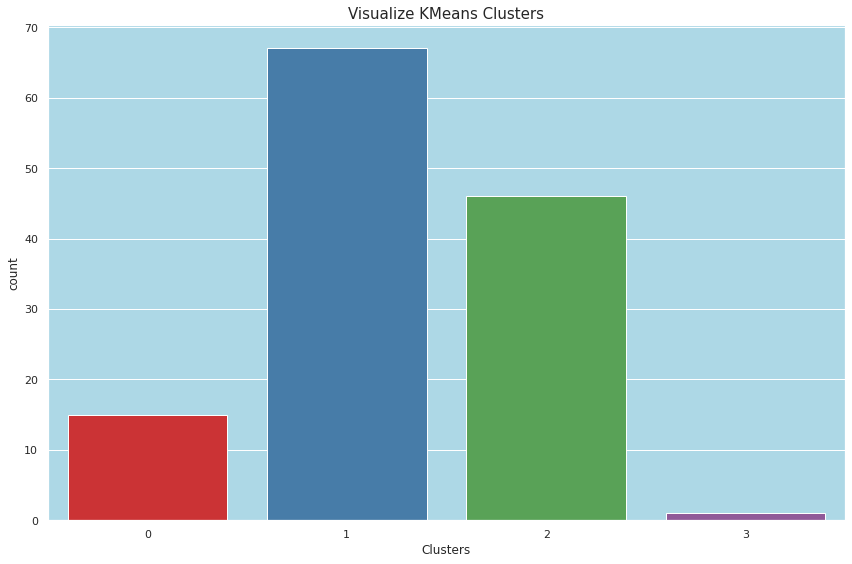

In [48]:
# To plot the countplot of different clusters
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.figure(figsize=(12,8))
sns.countplot(x=df_data['K_M_Clusters'], data=df_data, palette='Set1')
plt.title("Visualize KMeans Clusters", fontsize=15)
plt.xlabel("Clusters", fontsize=12)
plt.rcParams['axes.facecolor'] = 'lightblue'
save_fig("01_Cluster_count")
plt.show()

Saving figure 01_Features_KM_cluster


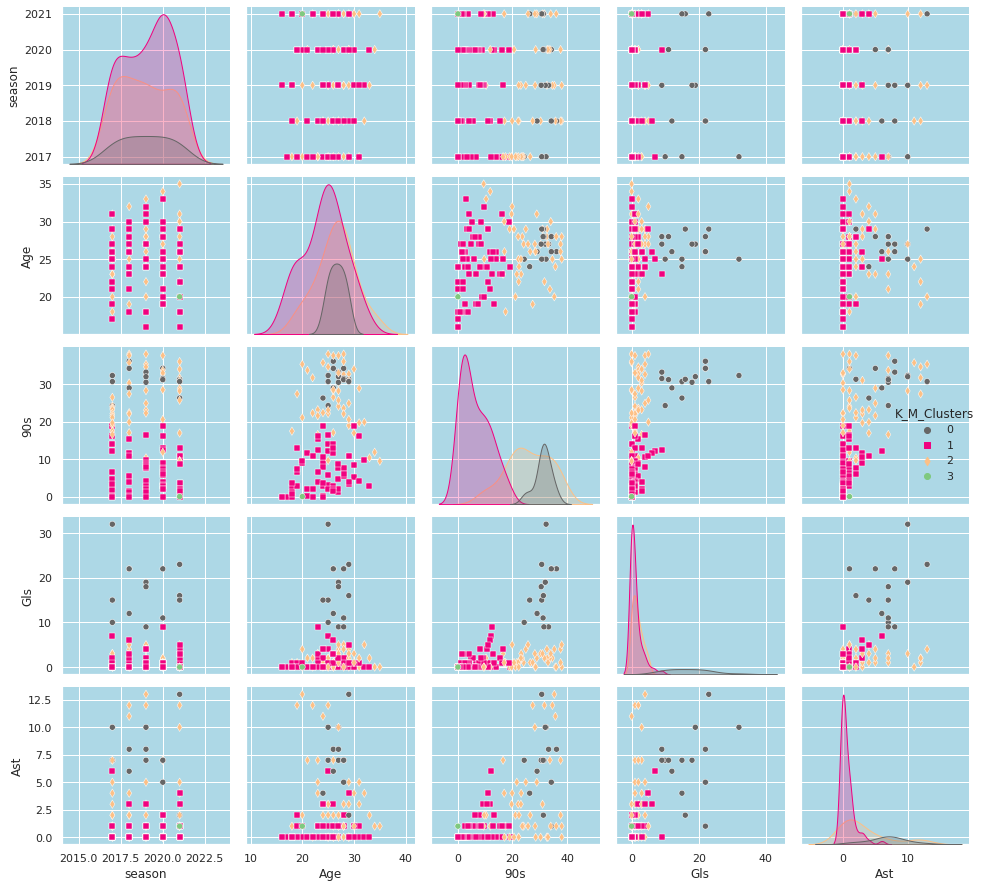

In [50]:
# To plot the clusterting distribution of all the important features
sns.pairplot(data=df_data, x_vars=['season','Age','90s','Gls','Ast'],
             y_vars=['season','Age','90s','Gls','Ast'], hue='K_M_Clusters', palette='Accent_r', markers=['o','s','d','o'])
save_fig("01_Features_KM_cluster")

Let us determine the common qualities that players share with each cluster in K-Means Clustering using the pairplot above:

Cluster 0 traits:
- Players in this cluster scored the most number of goals
- Players in this cluster played most matches each season
- Players in this cluster assists regularly
- Age of the players in this cluster are in their peak years which is between 23-29 years of age

Cluster 1 traits:
- Players in this cluster don't score many goals 
- Players in this cluster played less matches each season
- Players in this cluster rarely assist 
- Age of the players in this cluster range from teenagers to more than 30 years old

Cluster 2 traits:
- Players in this cluster doesn't score a lot of goals or less compare to cluster 1
- Players in this cluster played more matches or number of minutes than cluster 1
- Players in this cluster do more assists than cluster 1 players
- Players in this cluster are of mixed age

Cluster 3 traits:
- Includes players that never scored the goals
- Includes players that never played the matches
- Includes players that never did any assist
- Includes players that is having an age 20 or below

# Using PCA to visualise and improve results

PCA (Principal Component Analysis) is a basic way to reduce the number of dimensions by combining features in X in linear ways so that each new component captures the most information or variation in the data. Most of the time, n components is small, like 3, and can be used for data visualisation, data compression, and exploratory analysis.

I'll standardise the data using Scikit-StandardScaler Learn's class before fitting a PCA model to it.

In [52]:
stan_data.head()

,season,Player,Nation,Pos,Age,90s,Gls,Ast,G-PK,PK,...,G+A_90,G-PK_90,xG,npxG,xA,xG_90,xA_90,xG+xA_90,npxG_90,K_M_Clusters
0,2017,Mohamed Salah,eg EGY,FW,25,32.3,32.0,10.0,31.0,1.0,...,1.30,0.96,24.4,22.9,9.0,0.76,0.28,1.03,0.71,0
1,2017,Roberto Firmino,br BRA,FW,25,30.7,15.0,7.0,14.0,1.0,...,0.72,0.46,12.1,11.4,5.4,0.40,0.18,0.57,0.37,0
2,2017,Sadio Mané,sn SEN,FW,25,24.3,10.0,7.0,10.0,0.0,...,0.70,0.41,10.4,10.4,4.9,0.43,0.20,0.63,0.43,0
3,2017,Georginio Wijnaldum,nl NED,MF,26,26.5,1.0,2.0,1.0,0.0,...,0.11,0.04,2.5,2.5,1.5,0.10,0.06,0.15,0.10,2
4,2017,Jordan Henderson,eng ENG,MF,27,24.1,1.0,1.0,1.0,0.0,...,0.08,0.04,1.0,0.8,1.8,0.04,0.07,0.11,0.03,2


In [53]:
# To drop the unwanted features that adds nothing to the information
updated_data = stan_data.copy()
updated_data.drop(['Player','Nation','Pos','K_M_Clusters'], axis=1, inplace=True)
updated_data.head()

,season,Age,90s,Gls,Ast,G-PK,PK,CrdY,CrdR,Gls_90,Ast_90,G+A_90,G-PK_90,xG,npxG,xA,xG_90,xA_90,xG+xA_90,npxG_90
0,2017,25,32.3,32.0,10.0,31.0,1.0,1.0,0.0,0.99,0.31,1.30,0.96,24.4,22.9,9.0,0.76,0.28,1.03,0.71
1,2017,25,30.7,15.0,7.0,14.0,1.0,1.0,0.0,0.49,0.23,0.72,0.46,12.1,11.4,5.4,0.40,0.18,0.57,0.37
2,2017,25,24.3,10.0,7.0,10.0,0.0,3.0,1.0,0.41,0.29,0.70,0.41,10.4,10.4,4.9,0.43,0.20,0.63,0.43
3,2017,26,26.5,1.0,2.0,1.0,0.0,1.0,0.0,0.04,0.08,0.11,0.04,2.5,2.5,1.5,0.10,0.06,0.15,0.10
4,2017,27,24.1,1.0,1.0,1.0,0.0,1.0,0.0,0.04,0.04,0.08,0.04,1.0,0.8,1.8,0.04,0.07,0.11,0.03


In [54]:
# To standarise the data
pca_scaler = StandardScaler()
pca_scaled_data = pca_scaler.fit_transform(updated_data)

In [55]:
from sklearn.decomposition import PCA

# To find the number of principal components that reach the variance of around 95%
pca = PCA(n_components=0.95)
components = pca.fit(pca_scaled_data).transform(pca_scaled_data) 
print('Total no. of principal components =',pca.n_components_)

Total no. of principal components = 10


In [56]:
components.shape

(129, 10)

Since we've reduced our dataset to 2 dimensions, we can easily visualise this dataset. The below code will plot each digit with its associated principle component values.

Saving figure 01_PCs_Variance


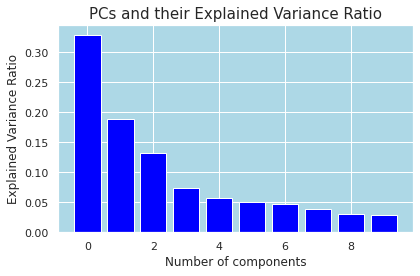

In [57]:
# To plot the explained variance ratio for each PC
var = pca.explained_variance_ratio_

plt.bar([i for i, _ in enumerate(var)],var,color='blue')
plt.title('PCs and their Explained Variance Ratio', fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=12)
save_fig("01_PCs_Variance")

Typically, we want the explained variance to be between 95-99%. Therefore, for that total number of components should be 10 according to the PCA above.

In [58]:
# To show the percentage of variance explained for each components
print("Explained variance ratio: %s" % str(pca.explained_variance_ratio_))

Explained variance ratio: [0.32918025 0.18888759 0.13286041 0.07343093 0.05728667 0.05028161
 0.0475373  0.03921077 0.03119828 0.02858303]


In [59]:
# To show the cumulative Variance explained by each PC
cumulative_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(cumulative_var)

[32.92 51.81 65.1  72.44 78.17 83.2  87.95 91.87 94.99 97.85]


Text(0, 0.5, 'Cumulative Explained Variance Ratio')

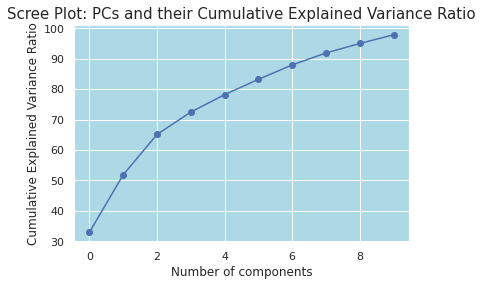

In [60]:
# To show the Scree plot
plt.plot(cumulative_var, marker='o')
plt.title('Scree Plot: PCs and their Cumulative Explained Variance Ratio',fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=12)

In [61]:
# To show Principal Component Data Decomposition
col_names = list(updated_data.columns)
pca_data = pd.DataFrame({ 'Features':col_names,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                          'PC4':pca.components_[3],'PC5':pca.components_[4], 'PC6':pca.components_[5], 'PC7':pca.components_[6], 
                          'PC8':pca.components_[7], 'PC9':pca.components_[8], 'PC10':pca.components_[9]})
pca_data

,Features,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,season,0.026893,0.105085,0.031256,0.018463,0.472021,-0.695228,-0.159165,0.433476,-0.005825,0.256169
1,Age,0.055736,-0.140764,-0.107381,-0.232071,0.526869,-0.100766,0.451508,-0.413171,-0.406225,-0.194207
2,90s,0.200108,-0.211862,-0.284025,0.186575,0.056289,-0.071624,-0.064444,-0.240050,-0.173115,0.146456
3,Gls,0.368338,-0.079712,0.005571,-0.099896,-0.109089,-0.013159,0.113208,-0.010915,0.112511,0.180021
4,Ast,0.255511,-0.095021,-0.243654,0.266239,-0.059571,0.019325,-0.273308,0.191910,-0.312826,-0.361927
5,G-PK,0.363553,-0.076978,0.013583,-0.105204,-0.123440,0.001175,0.045370,-0.063918,0.044543,0.283486
6,PK,0.229728,-0.060145,-0.046157,-0.021754,0.028760,-0.095149,0.478025,0.319438,0.478444,-0.537233
7,CrdY,0.034517,-0.144570,-0.262695,0.256306,0.355130,0.021451,-0.309035,-0.412852,0.629571,-0.000302
8,CrdR,0.024052,-0.050748,-0.126570,0.191669,0.448634,0.647776,0.170699,0.444438,-0.042701,0.306101
9,Gls_90,0.260494,0.043551,0.254825,-0.351353,0.207491,0.167176,-0.304177,0.013718,0.035958,-0.187442


In [62]:
pca_data.shape

(20, 11)

In [63]:
# To train the data for clustering again after PCA being applied
pca_kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=42)
pca_kmeans_4.fit(pca_scaled_data)

# predictions for pca scaled data
y_num = pca_kmeans_4.predict(pca_scaled_data)

Explained variance ration (first two components): [0.32918025 0.18888759]
Saving figure 01_PCA_2_Items


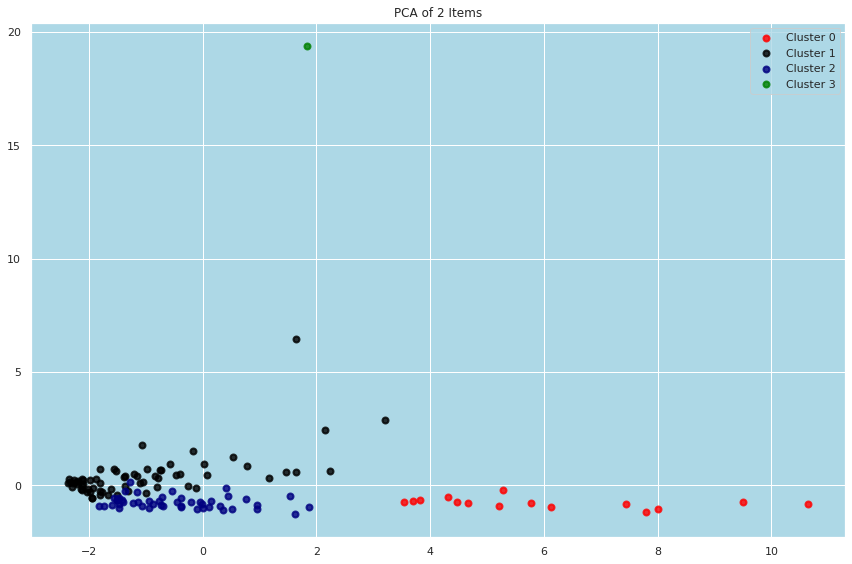

In [64]:
targets = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3']

# Number of components is equal to 2 so that I can visualise the data
pca = PCA(n_components=2, random_state=42)
X_r = pca.fit(pca_scaled_data).transform(pca_scaled_data)

# To show the percentage of variance for each component
print('Explained variance ration (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure(figsize=(12,8))
colors = ['red','black','navy','green']
lw = 2

for color, i, target in zip(colors, [0,1,2,3,4], targets):
    plt.scatter(x=X_r[y_num==i,0], y=X_r[y_num==i,1], color=color, alpha=.8, lw=lw, label=target)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of 2 Items')
save_fig("01_PCA_2_Items")
plt.show()

We can see, the variance explained by first and second principal components are nearly 25% and 17% respectively. We can now count cumulative variance explained by them. For convenience of observation, we are converting the figures to percentages here.

In [65]:
# Running PCA again with total 10 components
pca = PCA(n_components=10, random_state=42)
X = pca.fit(pca_scaled_data).transform(pca_scaled_data)

wcss2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    wcss2.append(kmeans.inertia_)

Saving figure 01_Elbow_point2


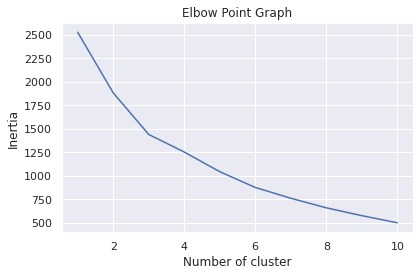

In [66]:
sns.set()
plt.plot(range(1,11), wcss2)
plt.title('Elbow Point Graph')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
save_fig("01_Elbow_point2")
plt.show()

In [67]:
# To check the updated inertia value after PCA
wcss2

[2524.4186337008887,
 1879.9667344363575,
 1437.4048084836168,
 1250.300880391959,
 1041.078183070074,
 873.6236862472267,
 758.7081029378272,
 656.7670092593271,
 573.3989596016553,
 497.5754836884841]

In conclusion, it can be seen that PCA managed to improve our results by reducing inertia for clustering.

In [68]:
# To check dataset again before downloading
stan_data.head()

,season,Player,Nation,Pos,Age,90s,Gls,Ast,G-PK,PK,...,G+A_90,G-PK_90,xG,npxG,xA,xG_90,xA_90,xG+xA_90,npxG_90,K_M_Clusters
0,2017,Mohamed Salah,eg EGY,FW,25,32.3,32.0,10.0,31.0,1.0,...,1.30,0.96,24.4,22.9,9.0,0.76,0.28,1.03,0.71,0
1,2017,Roberto Firmino,br BRA,FW,25,30.7,15.0,7.0,14.0,1.0,...,0.72,0.46,12.1,11.4,5.4,0.40,0.18,0.57,0.37,0
2,2017,Sadio Mané,sn SEN,FW,25,24.3,10.0,7.0,10.0,0.0,...,0.70,0.41,10.4,10.4,4.9,0.43,0.20,0.63,0.43,0
3,2017,Georginio Wijnaldum,nl NED,MF,26,26.5,1.0,2.0,1.0,0.0,...,0.11,0.04,2.5,2.5,1.5,0.10,0.06,0.15,0.10,2
4,2017,Jordan Henderson,eng ENG,MF,27,24.1,1.0,1.0,1.0,0.0,...,0.08,0.04,1.0,0.8,1.8,0.04,0.07,0.11,0.03,2


In [69]:
# Exporting clustering results
stan_data.to_csv("01_KM_clustering_results.csv", index=False)

# Using DBSCAN
DBSCAN is a density-based spatial clustering method. It sees clusters as high-density areas separated by low-density areas. Unlike K Means, which focuses on locating centroids and associating data points with that centroid in a spherical fashion, the DBSCAN algorithm may locate clusters of any convex form. DBSCAN is also resistant to low-density areas. DBSCAN, unlike k-means, will determine the number of clusters.

Here, I try to remove as many anomalies as possible so that the model has the right number of clusters.

In [70]:
# To train DBSCAN model
from sklearn.cluster import DBSCAN

# a minimum minPts can be derived from the number of dimensions D in the data set, as minPts = D + 1. 
# The low value min_samples = 1 does not make sense, as then every point on its own will already be a cluster. 
# With min_samples = 2, the result will be the same as of hierarchical clustering with the single link metric, 
# with the dendrogram cut at height e. Therefore, min_samples must be chosen at least 3.
dbs = DBSCAN(eps=3, min_samples=5)

# Where -1 indicates they are the outliers (do not fall in any clusters)
dbs_model = dbs.fit(pca_scaled_data)
labels = dbs_model.labels_
labels

array([-1,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  0,  1,
        0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1, -1,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0, -1,  0, -1,  1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1, -1, -1])

In [71]:
# identifying the points which makes up core points
cores = np.zeros_like(labels, dtype=bool)
cores[dbs.core_sample_indices_] = True

# calculating the number of clusters
dbs_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters are: ", dbs_clusters)

Number of clusters are:  2


In [72]:
# to calculate silhouetter score
print(silhouette_score(pca_scaled_data, labels))

0.3848543711607419


In [73]:
# To see the the amount of data divided into clusters
pd.Series(dbs_model.labels_).value_counts()

 0    105
-1     15
 1      9
dtype: int64

It can be seen that 88.37% of data points have been labelled to the first two clusters.

In [74]:
pca_scaled_data.shape

(129, 20)

In [75]:
# save the cluster labels and sort by cluster
data_copy = stan_data.copy()
data_copy = data_copy.drop('K_M_Clusters', axis=1)
data_copy['DB_clusters'] = dbs.labels_

In [76]:
# review the cluster centers
data_copy.groupby('DB_clusters').mean()

,season,Age,90s,Gls,Ast,G-PK,PK,CrdY,CrdR,Gls_90,Ast_90,G+A_90,G-PK_90,xG,npxG,xA,xG_90,xA_90,xG+xA_90,npxG_90
DB_clusters,,,,,,,,,,,,,,,,,,,,
-1,2019.533333,25.866667,21.173333,9.866667,4.866667,8.333333,1.533333,1.866667,0.333333,0.538000,0.914667,1.452667,0.488000,8.693333,7.420000,4.140000,0.703333,0.588000,1.292000,0.660667
0,2018.952381,25.095238,14.233333,1.285714,1.657143,1.266667,0.019048,1.561905,0.000000,0.111333,0.095714,0.206667,0.109524,1.208571,1.192381,1.419048,0.129905,0.092857,0.221714,0.128476
1,2019.222222,26.666667,30.877778,14.111111,5.444444,13.888889,0.222222,2.111111,0.000000,0.457778,0.176667,0.635556,0.451111,14.511111,14.344444,5.711111,0.473333,0.186667,0.655556,0.466667


In [77]:
data_copy.head()

,season,Player,Nation,Pos,Age,90s,Gls,Ast,G-PK,PK,...,G+A_90,G-PK_90,xG,npxG,xA,xG_90,xA_90,xG+xA_90,npxG_90,DB_clusters
0,2017,Mohamed Salah,eg EGY,FW,25,32.3,32.0,10.0,31.0,1.0,...,1.30,0.96,24.4,22.9,9.0,0.76,0.28,1.03,0.71,-1
1,2017,Roberto Firmino,br BRA,FW,25,30.7,15.0,7.0,14.0,1.0,...,0.72,0.46,12.1,11.4,5.4,0.40,0.18,0.57,0.37,1
2,2017,Sadio Mané,sn SEN,FW,25,24.3,10.0,7.0,10.0,0.0,...,0.70,0.41,10.4,10.4,4.9,0.43,0.20,0.63,0.43,-1
3,2017,Georginio Wijnaldum,nl NED,MF,26,26.5,1.0,2.0,1.0,0.0,...,0.11,0.04,2.5,2.5,1.5,0.10,0.06,0.15,0.10,0
4,2017,Jordan Henderson,eng ENG,MF,27,24.1,1.0,1.0,1.0,0.0,...,0.08,0.04,1.0,0.8,1.8,0.04,0.07,0.11,0.03,0


Saving figure 01_Features_DBSCAN_cluster


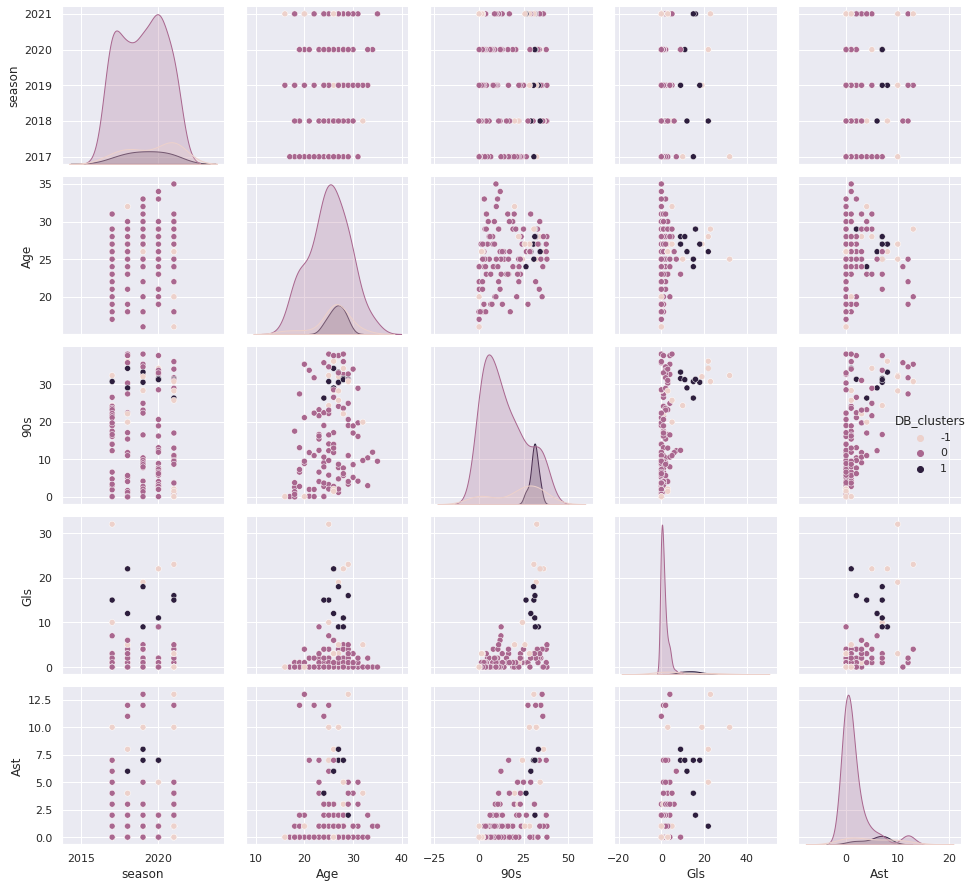

In [78]:
# To plot the DBSCAN clusterting distribution of all the important features
sns.pairplot(data=data_copy, x_vars=['season','Age','90s','Gls','Ast'],
             y_vars=['season','Age','90s','Gls','Ast'], hue='DB_clusters')
save_fig("01_Features_DBSCAN_cluster")

Let us determine the common qualities that players share with each cluster in DBSCAN using the pairplot above:

Cluster 0 traits:
- Age of the players in this cluster range from teenagers to more than 30 years old
- Most of the players in this cluster played less than 25 matches per season
- Players in this cluster scored less than 10 goals each season
- Most of the Players in this cluster assists less than 5 each season

Cluster 1 traits:
- Age of the players in this cluster range from 23 to 29 years old (peak performance years)
- Most of the players in this cluster played more than 25 matches each season
- Players in this cluster scored more than around 9 to 22 goals each season
- Players in this cluster assists around 1 to 8 each season

The value -1 above means that they don't fit into any clusters and can be thought of as an outlier. There were 15 outliers in total out of 129 instances.

In [79]:
data_copy.head()

,season,Player,Nation,Pos,Age,90s,Gls,Ast,G-PK,PK,...,G+A_90,G-PK_90,xG,npxG,xA,xG_90,xA_90,xG+xA_90,npxG_90,DB_clusters
0,2017,Mohamed Salah,eg EGY,FW,25,32.3,32.0,10.0,31.0,1.0,...,1.30,0.96,24.4,22.9,9.0,0.76,0.28,1.03,0.71,-1
1,2017,Roberto Firmino,br BRA,FW,25,30.7,15.0,7.0,14.0,1.0,...,0.72,0.46,12.1,11.4,5.4,0.40,0.18,0.57,0.37,1
2,2017,Sadio Mané,sn SEN,FW,25,24.3,10.0,7.0,10.0,0.0,...,0.70,0.41,10.4,10.4,4.9,0.43,0.20,0.63,0.43,-1
3,2017,Georginio Wijnaldum,nl NED,MF,26,26.5,1.0,2.0,1.0,0.0,...,0.11,0.04,2.5,2.5,1.5,0.10,0.06,0.15,0.10,0
4,2017,Jordan Henderson,eng ENG,MF,27,24.1,1.0,1.0,1.0,0.0,...,0.08,0.04,1.0,0.8,1.8,0.04,0.07,0.11,0.03,0


In [80]:
# To export hierarchical clustering results
data_copy.to_csv('01_DBSCAN_Results.csv', index=False)

## Hierarchical Clustering
There are two types of hierarchical clustering: Divisive and Agglomerative. In divisive (top-down) clustering method, all observations are assigned to a single cluster and then that cluster is partitioned to two least similar clusters, and then those two clusters are partitioned again to multiple clusters, and thus the process go on. In agglomerative (bottom-up), the opposite approach is followed. Here, the ideal no. of clusters is decided by dendrogram.

Method-1: Dendrogram Plotting using Clustermap

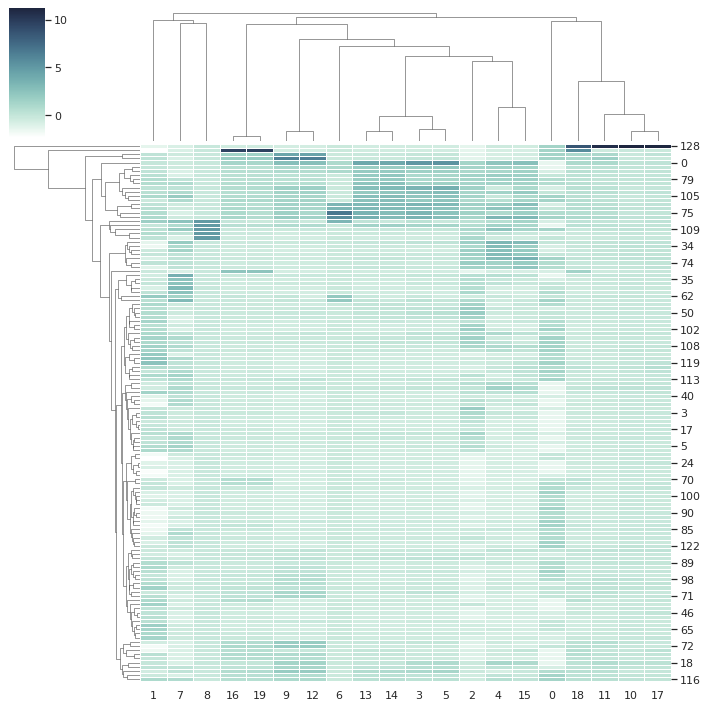

In [81]:
# To plot Dendrogram using clustermap
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sns.clustermap(pca_scaled_data, cmap=cmap, linewidths=.5)

From above dendrogram, we can consider 2 clusters at minimum or 6 clusters at maximum. We will again cross-check the dendrogram using Ward's Method. Ward's method is an alternative to single-link clustering. This algorithm works for finding a partition with small sum of squares (to minimise the within-cluster-variance).

Method-2: Dendrogram Plotting using Ward's Method

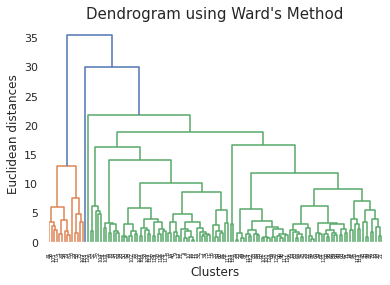

In [82]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
dendrogram = sch.dendrogram(sch.linkage(pca_scaled_data, method='ward'))
plt.title("Dendrogram using Ward's Method", fontsize=15)
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Euclidean distances', fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.show()

It can be seen 3 prominent clusters here (orange, blue, green). I will now follow the similar process of labelling data with cluster ids, then visualize the 4 clusters using various feature pairs, and finally I will export the results to a .csv file.

In [83]:
# To train the model using Heirarchical clustering
from sklearn.cluster import AgglomerativeClustering

hier_clust = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
Y_hc = hier_clust.fit_predict(pca_scaled_data)

In [84]:
# To check the labelled clusters
Y_hc

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2])

In [85]:
# To check the counts of the cluster
pd.Series(hier_clust.labels_).value_counts()

0    113
1     14
3      1
2      1
dtype: int64

In [89]:
# To save the cluster labels
data_hc = stan_data.copy()
data_hc = data_hc.drop('K_M_Clusters', axis=1)
data_hc['Hier_clusters'] = hier_clust.labels_
data_hc.head()

,season,Player,Nation,Pos,Age,90s,Gls,Ast,G-PK,PK,...,G+A_90,G-PK_90,xG,npxG,xA,xG_90,xA_90,xG+xA_90,npxG_90,Hier_clusters
0,2017,Mohamed Salah,eg EGY,FW,25,32.3,32.0,10.0,31.0,1.0,...,1.30,0.96,24.4,22.9,9.0,0.76,0.28,1.03,0.71,1
1,2017,Roberto Firmino,br BRA,FW,25,30.7,15.0,7.0,14.0,1.0,...,0.72,0.46,12.1,11.4,5.4,0.40,0.18,0.57,0.37,1
2,2017,Sadio Mané,sn SEN,FW,25,24.3,10.0,7.0,10.0,0.0,...,0.70,0.41,10.4,10.4,4.9,0.43,0.20,0.63,0.43,0
3,2017,Georginio Wijnaldum,nl NED,MF,26,26.5,1.0,2.0,1.0,0.0,...,0.11,0.04,2.5,2.5,1.5,0.10,0.06,0.15,0.10,0
4,2017,Jordan Henderson,eng ENG,MF,27,24.1,1.0,1.0,1.0,0.0,...,0.08,0.04,1.0,0.8,1.8,0.04,0.07,0.11,0.03,0


Saving figure 01_Hier_cluster


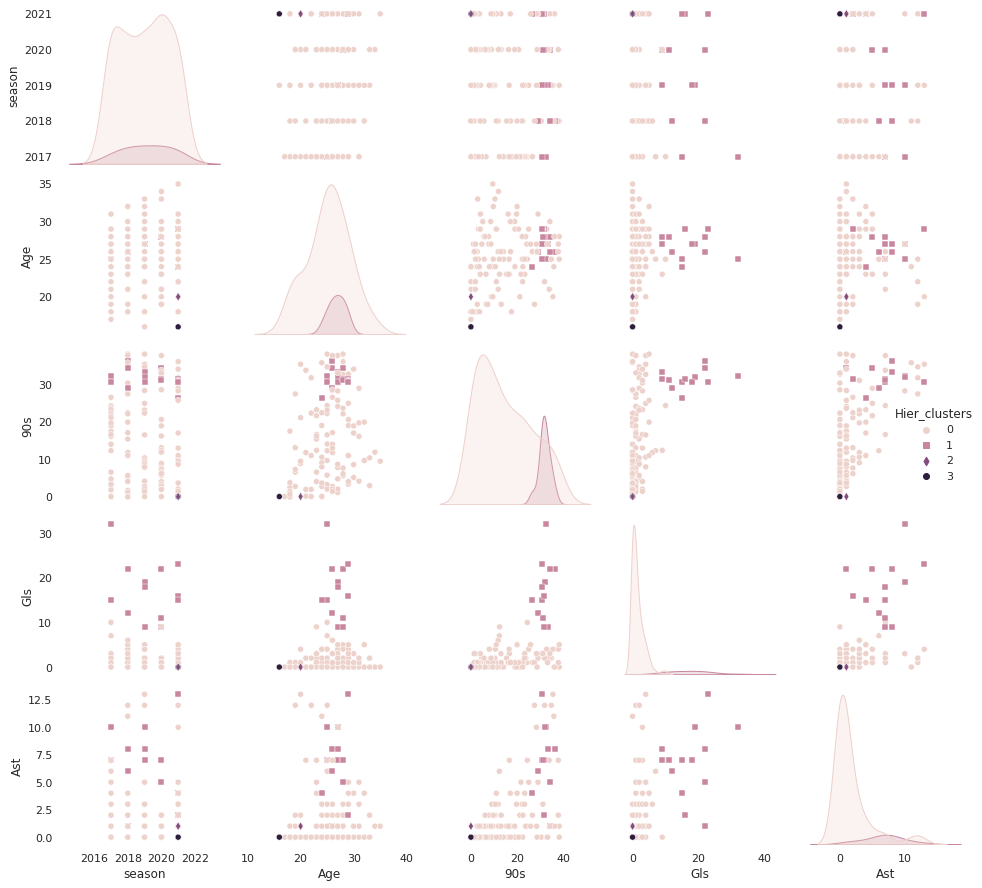

In [91]:
# To plot the Heirarchical clusterting distribution of all the important features
sns.pairplot(data=data_hc, x_vars=['season','Age','90s','Gls','Ast'],
             y_vars=['season','Age','90s','Gls','Ast'], hue='Hier_clusters', markers=["o", "s", "d","o"])
save_fig("01_Hier_cluster")
plt.show()

Let us determine the common qualities that players share with each cluster in Hierarchical Clustering using the pairplot above:

Cluster 0 traits:
- Age of the players in this cluster are all over the range
- Players in this cluster played 0 to 38 matches each season meaning it is mixed
- Players in this cluster scored less than 10 goals every season
- Assists of the Players in this cluster are spread all over the range


Cluster 1 traits:
- Age of the players in this cluster are in their peak years which is between 23-29 years of age
- Players in this cluster played more than 25 matches each season
- Players in this cluster scored more than 10 goals each season 
- Players in this cluster assists more than 2 every season  


For Clusters 2 and 3, there is only one clear example of each, so there are no common features.

In [88]:
# To export hierarchical clustering results
data_hc.to_csv('01_Hierchical_Results.csv', index=False)